# Исследование надежности заемщиков


**Общая информация:** Данное теоретическое исследование было проведено для кредитного отдела банка. Входные данные от банка — деперсонализированная таблица клиентов, где указаны такие характеристики как: семейное положение, уровень образования и дохода тип занятости и цели полеченных кредитов. В колонке `debt` указано был ли кредит выплачен в срок, или имелась просрочка.

**Цель исследования:** проанализировать, влияет ли уровень дохода, цель кредита, семейное положение и количество детей в семье клиента на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

**План работы:** 
1. Ознакомление с предоставленным данными
2. Предобработка данных (удаление пропусков и обработка аномалий)
3. Категоризация
4. Непосредственный анализ и ответы на поставленные вопросы




## Откроем таблицу и изучим общую информацию о данных

**1. Подключим необходимые библиотеки и прочитаем таблицу**

In [1]:
# Подгружаем все необходимые библиотеки для нашего исследования
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
# Читаем предоставленные данные и заносим их в переменную data
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**2. Выведем первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**3. Основную информацию о датафрейме отобразим с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Мы видим, что датасет имеет длину в ~21 000 строк и содержит как целочисленные, так и строковые данные в столбцах.

После ознакомления с данными мы видим, что тут есть над чем поработать. Уже на первой странице таблицы, полученной из кредитного отдела, есть пропуски данных (отсуствующие значения `NaN`), характеристики клиентов занесены и строчным и прописным регистром, отрицательные значения в стаже и т.д. Пора приступать к предобработке.

## Предобработка данных

### Удаление пропусков

**4. Посмотрим количество пропущенных значений для каждого столбца, используя комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**7. Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

**8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**10. Ещё раз взглянем на перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**11. Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**12. Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**14. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.**

In [15]:
data['education'] = data['education'].str.lower()

**15. Отобразим на экране количество строк-дубликатов в данных.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

После всех этих операций таблица выглядит более "причесанной", но главное - готовой для анализа. Мы можем групировать данные, не боясь наткнуться на неявные дубликаты и можем визуализировать зависимости. Но сначала выполним еще один шаг - разобъем важные численные данные на категории, чтобы с ними можно тоже можно было эффективно работать.

### Категоризация данных

**16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**18. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Будем использовать собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут нам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Теперь у нас есть все необходимые категории для анализа и обобщения результатов.

### Шаг 3. Исследуем данные и отвечаем на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# Проверим данные обычной группировкой
#print(data.groupby(['debt', 'children'])['debt'].count())
children_vs_debt = data.groupby(['children', 'debt'])['children'].count()
display(children_vs_debt)
# Цифры выглядят адекватно, признаков аномалий нет, но в данном случае трудно провести анализ по абсолютным значениям.


children  debt
0         0       13028
          1        1063
1         0        4364
          1         444
2         0        1858
          1         194
3         0         303
          1          27
4         0          37
          1           4
5         0           9
Name: children, dtype: int64

In [24]:
# Переведем эти данные в проценты.
data.pivot_table(index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean'])\
    .sort_values(by = ('mean', 'debt'), ascending = False)\
    .style.format({('mean', 'debt') : '{:.2%}'})

,count,sum,mean
,debt,debt,debt
children,,,
4,41,4,9.76%
2,2052,194,9.45%
1,4808,444,9.23%
3,330,27,8.18%
0,14091,1063,7.54%
5,9,0,0.00%


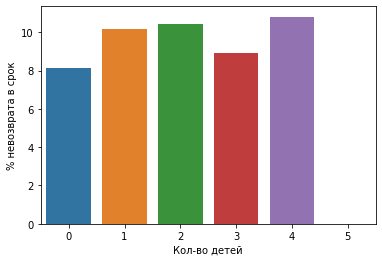

In [25]:
# Создадим переменные, которые будем наполнять.
ratio = 0
ratio_list = []
x_axis = []

# Циклом пройдемся по значениями и посчитаем соотношение
for index, value in children_vs_debt.items():
    if index[1] == 0:
        ratio = value
    else:
        ratio = value / ratio * 100 # Определяем процент не платящих в срок по сравнению с добросовестными кредиторами 
        ratio_list.append(ratio)
        x_axis.append(index[0])
        
# Последнюю строчку добавляем вручную, так как семей последнего типа с просрочками нет в датасете
ratio = 0 / ratio * 100
ratio_list.append(ratio)
x_axis.append(5)      
        
#print(ratio_list)
sns = seaborn.barplot(y=ratio_list, x=x_axis)
plt.xlabel("Кол-во детей")
plt.ylabel("% невозврата в срок")
plt.show(sns)


**Вывод:** 
Сгруппировав имеющиеся данные по количеству детей, и далее по факту просрочки, получаем, что процент невозвращаемых в срок кредитов колеблется от 8% до 11%. 

По факту, просрочки платежей меньше всего у заемщиков, которые не имеют детей, и больше всего у семей с 4 детьми. Но единой тенденции не прослеживается. Например в семьях с тремя детьми просрочек меньше, чем у семей с двумя или тремя детьми. В семьях с пятью детьми просрочек, по имеющимся данным, вообще не обнаружено. Скорее всего из-за того, что таких семей немного, и фактов займа почти нет.

Можно сделать общий вывод, что семьи, которые не имеют детей, являются более надежными заемщиками, и имеют большую вероятность возращения взятого кредита в срок.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
# Смотрим, что это вообще за категории
print(data['family_status'].unique())
print()
# Задача похожа на предыдущую, но для разнообразия чуть изменим подход.
# Какова мощность (кол-во строк) в каждой категории
family_status_total = data.groupby('family_status')['debt'].count()
print(family_status_total)
print()
# Сложим единички в колонке 'debt', чтобы определить кол-во просрочек
family_status_debt = data.groupby('family_status')['debt'].sum()
print(family_status_debt)
print()
family_status_vs_debt = family_status_debt / family_status_total * 100
# Упорядочим по возрастанию
family_status_vs_debt = family_status_vs_debt.sort_values()
print(family_status_vs_debt)


['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64

family_status
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
гражданский брак         385
женат / замужем          927
Name: debt, dtype: int64

family_status
вдовец / вдова           6.624606
в разводе                7.064760
женат / замужем          7.560558
гражданский брак         9.313014
Не женат / не замужем    9.763948
Name: debt, dtype: float64


In [27]:
# Картина вырисовывается, давайте сделаем своднюу таблицу для наглядности
data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean'])\
    .sort_values(by = ('mean', 'debt'), ascending = False)\
    .style.format({('mean', 'debt') : '{:.2%}'})


,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,9.76%
гражданский брак,4134,385,9.31%
женат / замужем,12261,927,7.56%
в разводе,1189,84,7.06%
вдовец / вдова,951,63,6.62%


['вдовец / вдова', 'в разводе', 'женат / замужем', 'гражданский брак', 'Не женат / не замужем']


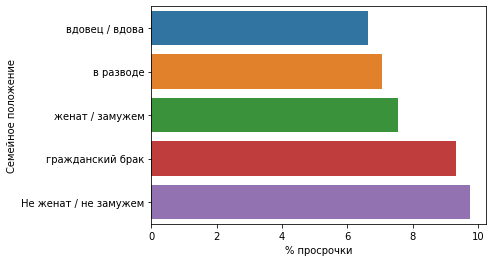

In [28]:
# Визуализируем

# Сначала создадим ось Х
x_axis = family_status_vs_debt.index.tolist()
print(x_axis)
# Да, в таком формате seaborn сможет понять эту ось.

sns = seaborn.barplot(y=x_axis, x=family_status_vs_debt.values)
plt.xlabel('% просрочки')
plt.ylabel('Семейное положение')
plt.show(sns)


**Вывод:** 
Проанализировав эту часть, видно, что самые ненадежные заемщики - это люди ранее никогда не состоящие в браке. Чуть более надежные - люди, состоящие в гражданском браке. Самые надежные заемщики - это вдовцы/вдовы и люди в разводе.

В общем, с разницей в 0.5% - 2% можно проследить некоторую зависимость семейного положения и вероятности возврата кредита в срок

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
# Задача схожая в предыдущей, но мы снова внесем чуть новизны: попробуем другой изученный инструмент - pivot_table
income_vs_debt_count = data.pivot_table(index=['total_income_category'], columns=['debt'], values='total_income', aggfunc='count' )
income_vs_debt_count['percent'] = income_vs_debt_count[1] / income_vs_debt_count[0] * 100
# Добавим расшифровку категорий для большей наглядности
category_explain = ['> 1 000 000', '200 000 - 1 000 000', '50 000 - 200 000', '30 000 - 50 000', '< 30 000']
income_vs_debt_count.insert(loc=0, column='category_explain', value=category_explain)
display(income_vs_debt_count)

debt,category_explain,0,1,percent
total_income_category,,,,
A,> 1 000 000,23,2,8.695652
B,200 000 - 1 000 000,4660,354,7.596567
C,50 000 - 200 000,14568,1353,9.287479
D,30 000 - 50 000,328,21,6.402439
E,< 30 000,20,2,10.000000


In [30]:
# Тут у меня возникла гипотеза: проценты - процентами, а ведь с абсолютных значениях картина может чуть отличаться. 
# Пусть по мелким займам будет больший процент невозврата или просрочки, но если все крупные займы возвращаются в срок
# то банк может не обращать слишком уж пристального внимания на мелкие и все равно оставаться в хорошем плюсе.
# Проверим эту гипотезу.
income_vs_debt_sum = data.pivot_table(index=['total_income_category'], columns=['debt'], values='total_income', aggfunc='sum' )
income_vs_debt_sum['percent'] = income_vs_debt_sum[1] / income_vs_debt_sum[0] * 100
# Добавим расшифровку категорий для большей наглядности
income_vs_debt_sum.insert(loc=0, column='category_explain', value=category_explain)
display(income_vs_debt_sum)

debt,category_explain,0,1,percent
total_income_category,,,,
A,> 1 000 000,30246198,3231751,10.684817
B,200 000 - 1 000 000,1336996578,100230192,7.496668
C,50 000 - 200 000,1865970560,174704112,9.362640
D,30 000 - 50 000,14079362,899871,6.391419
E,< 30 000,517665,49821,9.624178


total_income_category
A    1.228754
B    0.986849
C    1.008093
D    0.998279
E    0.962418
dtype: float64

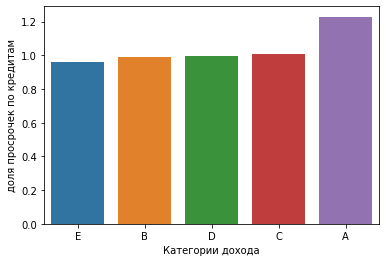

In [31]:
# Да, картина чуть поменялась. Чтобы сравнить, соотношение просрочек и соотношение доходов, и посмотрим их взаимосвязь

income_vs_debt_overdue = income_vs_debt_sum[1] / income_vs_debt_count[1]
income_vs_debt_intime = income_vs_debt_sum[0] / income_vs_debt_count[0]

income_vs_debt = income_vs_debt_overdue / income_vs_debt_intime
display(income_vs_debt)

income_vs_debt = income_vs_debt.sort_values()

# Посмотрим на диаграмме

sns = seaborn.barplot(y=income_vs_debt.values, x=income_vs_debt.index.to_list())
plt.xlabel('Категории дохода')
plt.ylabel('доля просрочек по кредитам')
plt.show(sns)


**Вывод:** 
Единая динамика зависимости уровня дохода и возврат кредита в срок не прослеживается, однако можно выявить крайние (максимальные и минимальные) значения и сделать определенные выводы. Самыми надежными заемщиками являются люди со средним доходом (30 000 - 50 000 р). Просрочки у этой категории заемщиков составляют порядка 6.5%.

Давайте так же взглянем на наиболее распространенные категории заемщиков: "B" и "C". Из вышеприведенной сводной таблицы видно, что в денежном выражении на эти две категории приходится наиболее количество выданных кредитов. Между этими двумя категориями самый большой разрыв - почти 2%! Это говорит нам о том, что категория заемщиков "B" с доходом от 200 000 до 1 000 000 р вторая по надежности. 

Получается, что при выдачи кредитов, категория "C" должна проверятся намного тщательнее, чем "D" и "B"

Наибольшее кол-во просрочек наблюдается у категории "E" с доходом до 30 000 р. и ниже.

Дополнительно, если мы посмотрим на просрочки по кредитам в абсолютных значениях, категория заемщиков с доходом ниже 30 000 р. значительно уступает категории "А" - заемщики с доходом выше миллиона, так как в абсолютных значениях заемщики категории E берут небольшие кредиты. Категория А резко выделяется по просрочкам в абсолютных значениях, что означает, что банк недополучает вовремя крупные суммы, и обслуживание кредитов категории А для банка является самым затратным.

In [32]:
data.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean'])\
    .sort_values(by = ('mean', 'debt'), ascending = False)\
    .style.format({('mean', 'debt') : '{:.2%}'})

,count,sum,mean
,debt,debt,debt
total_income_category,,,
E,22,2,9.09%
C,15921,1353,8.50%
A,25,2,8.00%
B,5014,354,7.06%
D,349,21,6.02%


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

debt          ratio
                          count  sum          
purpose_category                              
операции с автомобилем     4279  400  9.347978
операции с недвижимостью  10751  780  7.255139
получение образования      3988  369  9.252758
проведение свадьбы         2313  183  7.911803

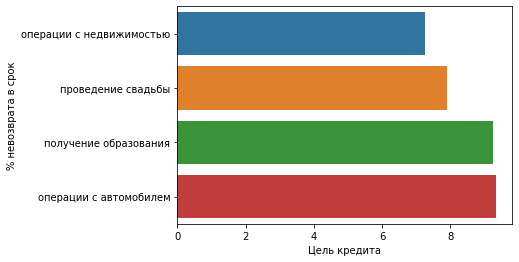

In [33]:
# На этот раз воспользуемся изученной функцией agg, ее еще не было в этом проекте
purpose_vs_debt = data.groupby('purpose_category').agg({'debt' : ['count', 'sum']})
purpose_vs_debt['ratio'] = purpose_vs_debt['debt']['sum'] / purpose_vs_debt['debt']['count'] * 100
display(purpose_vs_debt)

purpose_vs_debt = purpose_vs_debt.sort_values(by='ratio')

sns = seaborn.barplot(y=purpose_vs_debt.index.to_list(), x=purpose_vs_debt['ratio'])
plt.xlabel('Цель кредита')
plt.ylabel('% невозврата в срок')
plt.show(sns)


**Вывод:** 
На диаграмме видим, что существует взаимосвязь между целями кредита и количеством просрочек. С точки зрения банка, наименьший риск составляют ипотечные займы. По идее, такие кредиты банк должен выдавать наиболее охотно. Рекламный бюджет по этой категории преобладал бы перед остальными категориями. Наиболее рискованные цели займа - это операции связанные с автомобилями. Есть смысл проверять таких заемщиков более тщательно, чтобы минимизировать риск просрочки.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
На мой взгляд, в нашем случае, ошибки и пропуски в данных - это техническая проблема. Даже если ошибка идет от человека, разработчики могут настроить формы, заполняемые сотрудниками банка, чтобы не пропускать неправильно заполненные поля, таким образом пресекая проникновения человеческого фактора в сводки данных. Заглавные буквы в образовании можно было бы преобразовать в строчные, для целей кредита сделать выпадающий список, подсвечивать незаполненные поля, чтобы избежать NaN значений в выгрузке.

В противном случае, все эти недочеты валяться на аналитика и замедляют его работу. Тут есть повод поговорить с разработчиками, чтобы это исправить. Конечно, у разработчиков свои приоритеты, и такая просьба может показаться им неважной и ненужной, но попросить поставить эту задачу в один из следующих бэклогов стоит.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Такой подход избавляет от необходимости работать с резкими отклонениями значений (артефактами). Например, в колонке дохода могут быть отдельные личности, - единичные случаи, со слишком высоким доходом, которые задерут среднее арифметическое вверх, что ляжет в основу неверного представления и ошибок в анализе. Медианное значение поможет избежать подобных проблем.

### Шаг 4: общий вывод.

Проведя данное исследование мы выясняли ряд важных моментов.

Предоставленные данные содержали ошибки выгрузки, и нужно указать на это разработчикам систем обработки кредитных заявок. Регламентирование этой административной линии  исправит в будущем пропущенные значения в данных, такие аномалии, как отрицательный стаж, и неявные дубликаты категорий, указанные в разном регистре. Это поможет более слаженной работе между разработчиками, аналитиками, отделом маркетинга и операционными сотрудниками.

При непосредственном анализе предоставленных данных были выявлены определенные взаимосвязи между характеристиками заемщикам и его способностью возврата кредита в срок.

Наименьший процент просрочки выплаты кредитов наблюдается у кредиторов без детей, либо в случае, когда в семье три ребенка. Семьи с один, двумя и четырьмя детьми статистически имеют более высокий процент просрочки выплат.

Было выяснено, что семейное положение также влияет на своевременный возврат кредитного долга. Заемщики, имеющие статус вдовца/вдовы, имеют наибольшую вероятность своевременных кредитных платежей. По статистике, у таких кредиторов - 6.5% просрочек. На втором месте – заемщики, находящиеся в разводе - 7% просрочек. На третьем месте заемщики имеющие официальные отношения - 7.5% просрочек. Оставшиеся две категории (гражданский брак и отсутствие отношений) имеют больший отрыв по процентам от первых трех категорий и составляют 9.3% и 9.7% соответственно. Эти две последние категории представляют наибольший риск для банк в плане возврата кредита.

Если разделить заемщиков на категории по уровню дохода, то самыми надежными оказались клиенты категории D (доход от 30 000 до 50 000 р) - 6.5% просрочек, и категории B (доход от 200 000 до 1 000 000 р) - 7.5% просрочек по выплатам. Самыми ненадежными, ожидаемо, оказались клиенты с доходом ниже 30 000 р.

Влияние цели кредита на просрочку по выплате распределилось следующим образом: самыми надежными оказались ипотечные займы - 7.3% просрочки и кредиты на свадьбу - 7.9%. Кредиты на образование и операции с автомобилем имеют в среднем 9.3% просрочек. Эти цели кредитов являются более рискованными для банка. Их рекомендуется выдавать под более высокий процент.

В целом, при оценке рисков возврата кредитов можно проследить взаимосвязь как с семейным положением и количеством детей в семье, так и с целями кредита и уровнем дохода потенциального заемщика. Но эти взаимосвязи не линейные (риск просрочки не растет прямо пропорционально или обратно пропорционально увеличению дохода, кол-ву детей и т.д.). На основе этих данные нельзя вывести какую-то общую алгебраическую формулу. Поэтому, для оценки потенциальных заемщиков я бы рекомендовал использовать скоринговую систему, где разным характеристикам клиентов было бы присвоено различное количество очков, и потом подсчитывалась бы общая сумма риска невозврата кредита.